In [ ]:
# !pip install SMOTE

In [ ]:
# !pip install imbalanced-learn

In [ ]:
# !pip install -U scikit-learn imbalanced-learn

In [ ]:
# pip install tensorflow

In [ ]:
# pip install xgboost

In [ ]:
# pip install gensim

In [ ]:
# pip install numpy

In [ ]:
# pip install pandas

In [ ]:
# pip install matplotlib

In [ ]:
# pip install transformers

In [ ]:
# pip install nltk

In [ ]:
# nltk.download('stopwords')

In [ ]:
# nltk.download('punkt')

In [ ]:
# nltk.download('wordnet')

In [ ]:
# pip install gensin

In [ ]:
# pip install contractions

In [5]:
# pip install pyLDAvis

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 2.6 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.6 MB 6.0 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.6 MB 7.9 MB/s eta 0:00:01
   ------------------------ --------------- 1.6/2.6 MB 9.3 MB/s eta 0:00:01
   ----------------------------------- ---- 2.3/2.6 MB 10.4 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 11.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [45]:
# nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\blobb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# import keras.preprocessing.text Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.models import Sequential
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
import xgboost as xgb
from gensim.models import KeyedVectors
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import HashingVectorizer
# import spacy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.preprocessing import Normalizer
from gensim.models import KeyedVectors
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from gensim.models import KeyedVectors
import random
import tensorflow as tf
from nltk import ngrams
import os
import seaborn as sns
import contractions
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.lda_model
from sklearn.decomposition import NMF
from wordcloud import WordCloud
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import TrainingArguments, Trainer
from datasets import Dataset
import torch
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.models import load_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Input, Embedding, LSTM, Dense, Dropout, Activation,SpatialDropout1D
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA
from bs4 import BeautifulSoup

In [21]:
"""Setting seeds at the begining itself for reproducibility """

def reset_random_seeds(SEED=42):
   os.environ['PYTHONHASHSEED']=str(SEED)
   tf.random.set_seed(SEED)
   np.random.seed(SEED)
   random.seed(SEED)
reset_random_seeds(SEED=42)

# Data Exploration and Visualization

### Dataset Overview
We begin by importing two datasets: a training set and a test set, using Pandas' read_csv function. This step is foundational, as it prepares the data for subsequent exploration and analysis.

In [22]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

To gain a preliminary understanding of the data, train.describe() is utilized. This method provides descriptive statistics including count, mean, standard deviation, min, and max values for numeric columns in the training dataset. It's a crucial step to quickly assess data distribution and potential outliers, aiding in making informed decisions about data preprocessing and analysis strategies. In our case since we initally were given only the text and classes we only use this to get an idea of the size of the data frame and the highest and lowest class given to us.

In [23]:
train.describe()

,overall
count,370863.000000
mean,4.566600
std,0.930377
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [24]:
train.head(20)

,overall,Review
0,5,I love these glitter pens. They sparkle deligh...
1,5,It works well with my machine. I use mostly c...
2,5,"This is a great assortment of colors, though t..."
3,5,Just what I was looking for.
4,5,I make 400 birds for the hospital each month.
5,1,not very sharp
6,5,Its just a replacement blade
7,5,"Great value,"
8,3,It is just okay for me. The plastic is a bit ...
9,5,Always happy when I find a great priced art gi...


In [25]:
train.shape

(370863, 2)

In [26]:
train.isnull().sum()

overall    0
Review     8
dtype: int64

In [27]:
train.isnull().sum()

overall    0
Review     8
dtype: int64

Here we checked for duplicate valuse and deleted them as, these duplicate values cause the model to overfit and not generalize properly

In [28]:
train.duplicated().sum()

93449

In [29]:
train = train.drop_duplicates()

In [30]:
train.shape

(277414, 2)

The 'Review' column in the training dataset, which contains textual data, is explicitly converted to string type to ensure consistency. This conversion was done to prevent errors during text processing and analysis that was brought up due to incorrect data types. This was also done to deal with null values which were presneted in our dataset, we did not remove the null values as these values were also present in the test set.

In [31]:
train["Review"]= train["Review"].astype(str)

### Text Length Analysis
An additional feature, text_length, is created by calculating the number of words in each review. This is achieved through applying a lambda function that splits each review by spaces and counts the resulting words. This analysis was done to gain insights regarding the following:

* Understanding Content Depth: Longer texts might provide more detailed feedback, whereas shorter texts could indicate lack of detail in reviews.
* Preprocessing Insights: Knowing the distribution of text lengths can inform decisions on text normalization steps such as truncation or padding, especially for models requiring fixed-length input.

A histogram is plotted to visualize the distribution of text lengths in the training dataset. This visualization is instrumental for several reasons:

* Data Distribution Clarity: It offers a clear visual representation of how text lengths are distributed, highlighting common lengths, outliers, and the overall spread.
* Insights into Dataset Characteristics: The distribution reveals patterns or anomalies in the data, such as a large number of very short or very long reviews, guiding further analysis and preprocessing steps.

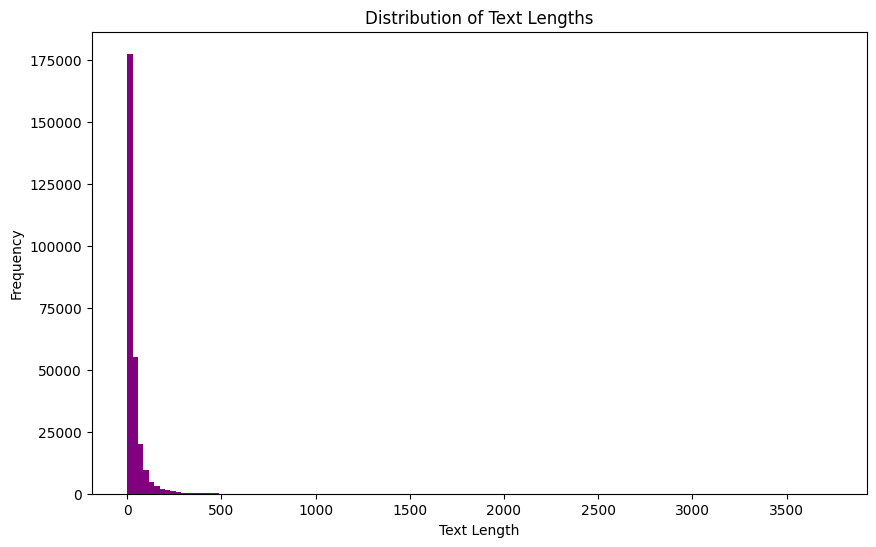

In [32]:
train['text_length'] = train['Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(train['text_length'], bins=130, color='purple')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

### Word Frequency Analysis
Using the word_tokenize method from the NLTK library, we tokenize each review into words, converting them to lowercase to ensure uniformity. The frequencies of these words were then counted using Python's Counter class, identifying the 20 most common words.

#### Visualization of Word Frequencies

A bar chart was plotted to visualize these frequencies, offering immediate insight into the most prevalent words across all reviews. This visualization was crucial for several reasons:

* Common Language Patterns: It helped us identify common language usage patterns within the dataset, which were necessary for understanding the nature of the text being analyzed.
* Preprocessing Insights: Highlighting frequent words aided in recognizing stopwords or irrelevant words that would need to be filtered out in later preprocessing steps to enhance model performance.

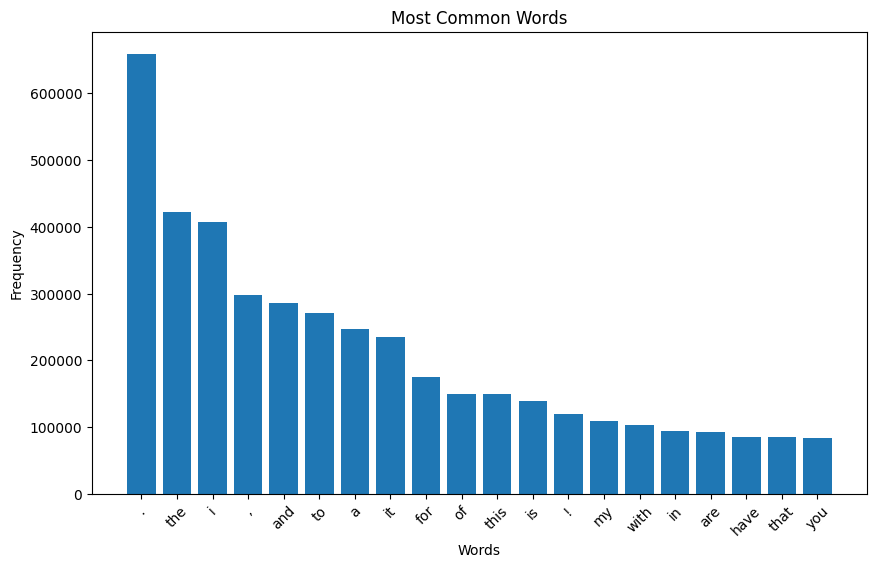

In [33]:
word_counts = [word for text in train['Review'] for word in word_tokenize(text.lower())]
word_counts = Counter(word_counts)
most_common_words = word_counts.most_common(20)
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

### N-gram Analysis
#### Bigrams

Bigrams were generated for each review using a custom generate_ngrams function, which we designed to create n-gram tokens. The 20 most common bigrams were then identified and visualized in a bar chart. This:
* Revealed Contextual Relationships: Offered insights into common two-word phrases, providing context that single words cannot.
* Guided Feature Engineering: Understanding frequent bigrams can inform decisions on feature selection for models that benefit from recognizing word sequences.

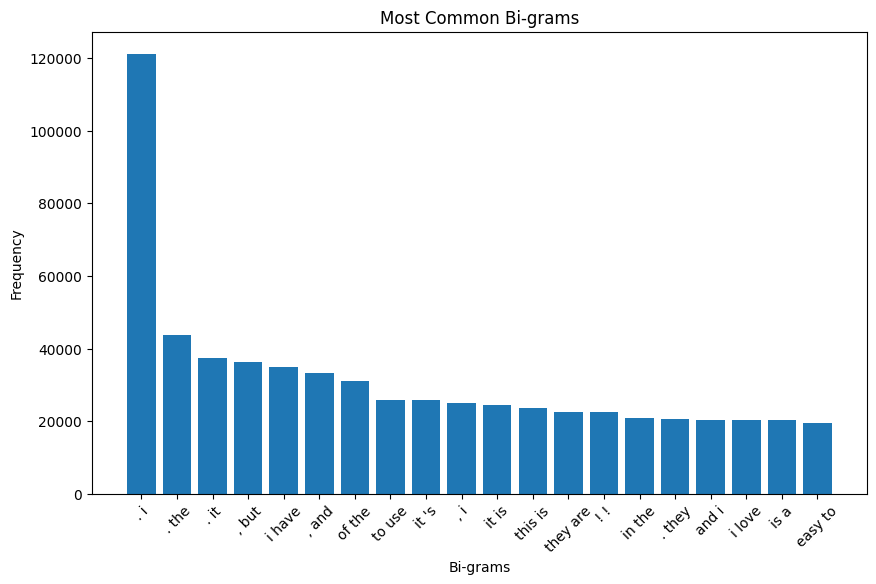

In [34]:
def generate_ngrams(text, n=2):
    words = word_tokenize(text.lower())
    ngrams_list = [' '.join(grams) for grams in ngrams(words, n)]
    return ngrams_list

bigrams = [bigram for text in train['Review'] for bigram in generate_ngrams(text, n=2)]
bigram_count = Counter(bigrams).most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*bigram_count))
plt.title('Most Common Bi-grams')
plt.xticks(rotation=45)
plt.xlabel('Bi-grams')
plt.ylabel('Frequency')
plt.show()

#### Trigrams

Following a similar methodology, trigrams (3-word sequences) were also extracted and analyzed. The visualization of the most common trigrams further enriches the understanding of the data by:

* Enhanced Contextual Insight: Illustrating how sequences of three words are commonly used together in the dataset.
* Informing Text Representation These insights can further guide the selection of text representation techniques that preserve word order,capturing more meanings.

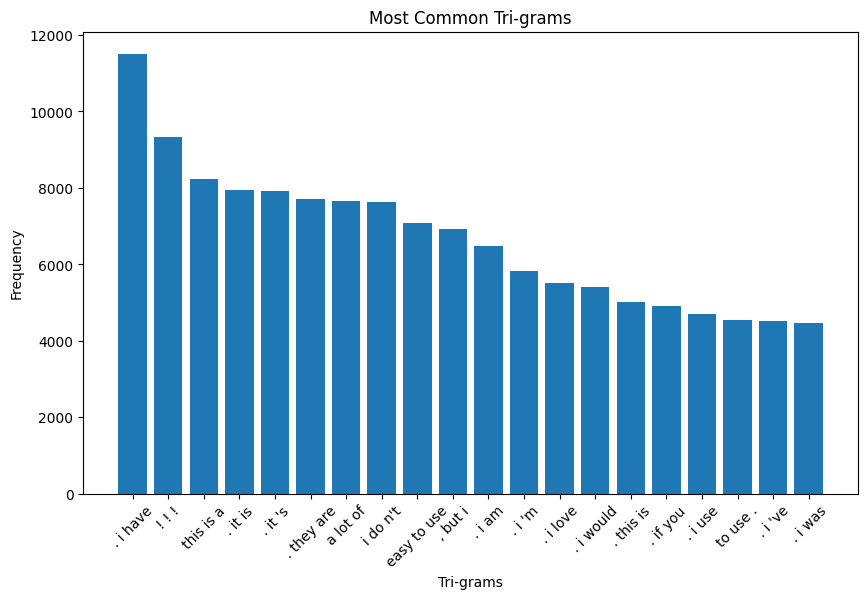

In [35]:
trigrams = [trigram for text in train['Review'] for trigram in generate_ngrams(text, n=3)]
trigram_count = Counter(trigrams).most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*trigram_count))
plt.title('Most Common Tri-grams')
plt.xticks(rotation=45)
plt.xlabel('Tri-grams')
plt.ylabel('Frequency')
plt.show()

After analyzing the visualizations for the N-Grams, we realized that the texts required further cleaning. The majority of the phrases displayed contained a lot of stop words, punctuation, and abbreviations, which could introduce biases during the model training process.

### Class Distribution Analysis
A histogram of the 'overall' column from the training dataset was plotted to understand the distribution of class labels (ratings) across reviews. This helped us with

* Balancing Insight: It identifies if there are imbalances in class distribution that could affect model training and necessitate strategies like oversampling or class weighting.
* Strategic Modeling: Understanding class distribution can guide model selection and evaluation strategies, ensuring they are robust against potential class imbalances.

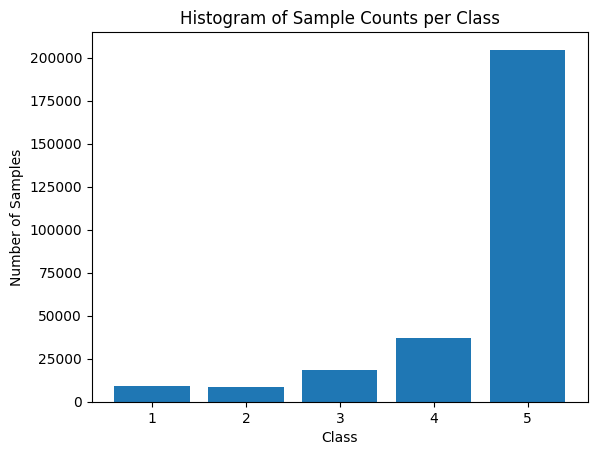

In [36]:
class_counts = train['overall'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Histogram of Sample Counts per Class')
plt.show()

A descriptive analysis of the test dataset was performed using .describe(), mirroring the initial steps taken with the training dataset. This ensures consistency in understanding both datasets' characteristics and prepares for effective model evaluation.

In [37]:
test.describe()

,id
count,123622.000000
mean,61810.500000
std,35686.741826
min,0.000000
25%,30905.250000
50%,61810.500000
75%,92715.750000
max,123621.000000


In [38]:
test.head(20)

,id,Review
0,0,Wonderful asst. of wood carving tools
1,1,Pretty lace with 4 way stretch. I was exactly ...
2,2,This is a quick and easy way to start a crazy ...
3,3,"This is my favorite journals, the pages are ve..."
4,4,I bought this for a costume i was making. i wa...
5,5,Great idea but they don't cut well
6,6,Love this thread.
7,7,GOOD REUSABLE PRODUCT. MADE BAR LOTION WITH T...
8,8,After trial and error with various brands of a...
9,9,They are really smelly - like a vinyl shower c...


In [39]:
test.isnull().sum()

id        0
Review    4
dtype: int64

In [40]:
test.duplicated().sum()

0

In [41]:
test.shape

(123622, 2)

# Text Preprocessing and Normalizing 

In this section to conduct different experiments we will be using the Stochastic Gradient Descent (SGD) with Binary CountVectorizer. 

Initially, the SGD classifier paired with a Binary CountVectorizer, was evaluated without any preprocessing of the text data. This baseline model serves as a point of reference for assessing the impact of subsequent text preprocessing and normalization experiments on model performance.

Later we test the model with basic cleaning of the data like:

1. Converting the text to lower cases
2. Expanding words
3. Removing special charactres
4. Tokenizing
5. Removing Stop words.

After the following clening the model is again tested and differnce in performance was noted.

Following the initial preprocessing steps, advanced text processing experiments were conducted to explore their impact on model performance. 
The following were the experiments done:

1. Stemming
2. Lemmatizing
3. Lemmatizing with POS Tagging
4. Stemming and lemmatizing together

The sequence of experiments and their outcomes are displayed below along with a thorough analysis of the experiments.


We split our given train set into train and test(80-20) since the given test set did not have the labels. We stratified the dataset while splitting.

In [42]:
y = train["overall"]
X_train, X_test, y_train, y_test = train_test_split(train["Review"], y, stratify=y,test_size=0.3, random_state=42)

c:\Users\blobb\.conda\envs\torch\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\blobb\.conda\envs\torch\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\blobb\.conda\envs\torch\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\blobb\.conda\envs\torch\lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinsta

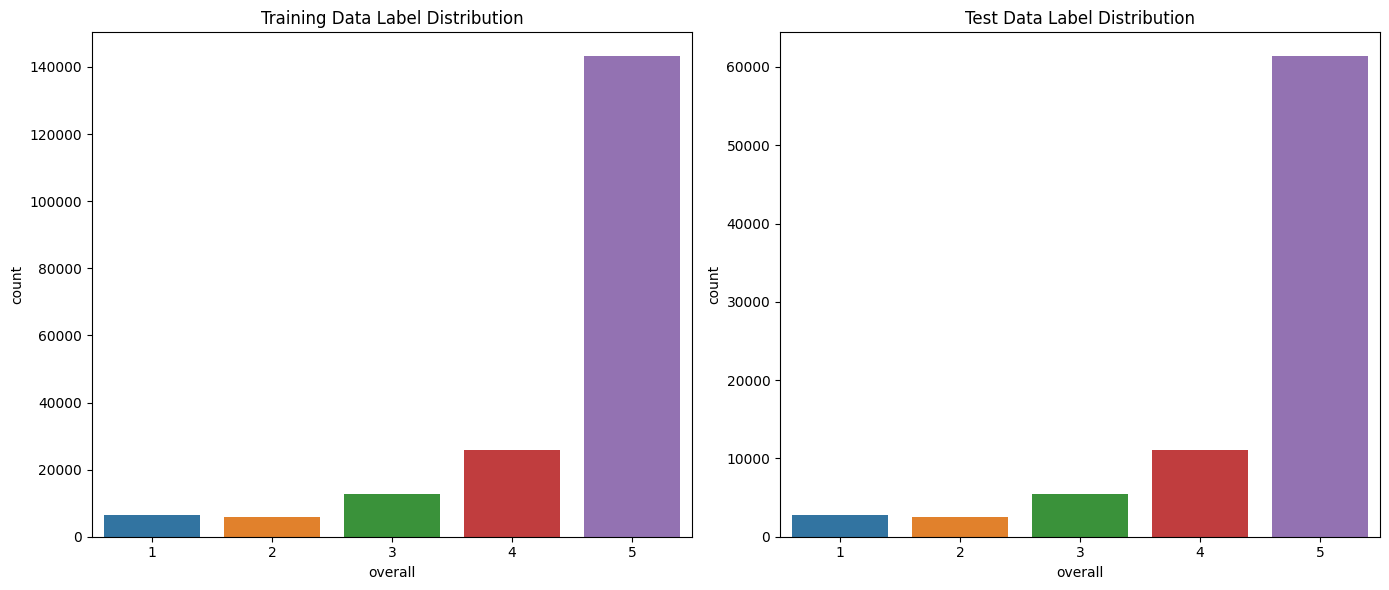

In [43]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Training Data Label Distribution')
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Test Data Label Distribution')
plt.tight_layout()
plt.show()


### Basic Text Cleaning
A series of fundamental text cleaning steps were applied to the dataset before re-evaluating the model. These steps included:

1. Lowercasing: Convert all text to lower case to ensure uniformity.
2. Expanding Words: Expand contracted words to their full forms to standardize text and reduce ambiguity.
3. Removing Special Characters: Eliminate special characters, keeping only alphanumeric characters and whitespace.
4. Removing HTML tags from the text
5. Tokenizing: Split text into individual words or tokens to facilitate further processing like stop word removal.
6. Removing Stop Words: Filter out common words (e.g., "the", "is", "in") that offer little value in understanding the text's context or sentiment.
Implementing these preprocessing steps aims to clean and standardize the dataset,helping improve model performance by focusing on more meaningful text elements.

In [44]:
def cleaning_text(text):
    text = text.lower()
    text = contractions.fix(text)
    
    pattern = r"[^\w\s]"
    # Removing html tag
    text = re.sub(r'<.*?>', ' ', text)
    # Only keeps alpha numeric values
    text = [''.join([char if char.isalnum() else ' ' for char in word]) for word in text.split()]
    text = ' '.join(text)
    text =  re.sub(pattern,'',text)
    # used word_tokenize function to tokenize the text, gives list
    tokenized_text = word_tokenize(text)
    # get the stop words
    stop_words = set(stopwords.words('english'))
    # removed stop words
    tokenized_text = [word for word in tokenized_text if word not in stop_words]
    preprocessed_text = ' '.join(tokenized_text)
    return preprocessed_text
    

### Advanced Text Processing Experiments
Following basic cleaning, more sophisticated text processing techniques were explored to further understand their impact on the model. These experiments included:

1. Stemming: Reducing words to their base or root form, which can help in consolidating different forms of a word (e.g., "running" to "run").
2. Lemmatizing: Similar to stemming, but ensures that the reduced form is a valid word in the language, aiming for a balance between reducing 3. word complexity and maintaining semantic meaning.
3. Lemmatizing with POS Tagging: Applying Part-Of-Speech (POS) tagging before lemmatizing, which can improve lemmatization accuracy by understanding the context in which a word is used.
4. Combining Stemming and Lemmatizing: A dual approach to see if combining both methods offers any advantage in preprocessing.

In [45]:
def get_POS(tag):
    return {
        'J': wordnet.ADJ,
        'V': wordnet.VERB,
        'N': wordnet.NOUN,
        'R': wordnet.ADV
    }.get(tag[0], wordnet.NOUN) 

def preprocess(text,stemming = False, lemmatizing = False, POS = False):
     tokenized_text = word_tokenize(text.lower())
     if stemming: 
          # applying stemming
          stemmer = PorterStemmer()
          tokenized_text = [stemmer.stem(word) for word in tokenized_text]
     if POS:
        lemmatizer = WordNetLemmatizer()
        pos_tagged = pos_tag(tokenized_text)  # Apply POS tagging
        tokenized_text = [lemmatizer.lemmatize(word, get_POS(tag)) for word, tag in pos_tagged]

     if lemmatizing:
     # applying lemmatization
          lemmatizer = WordNetLemmatizer()
          tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]
     preprocessed_text = ' '.join(tokenized_text)
     return preprocessed_text

### Experimental Setup and Results
To conduct different experiments, a create_pipeline function was defined to dynamically construct a processing pipeline incorporating a vectorizer, optional normalization, feature selection, and the classifier. A custom text cleaning function and preprocessing functions were used to apply the different text normalization techniques.

To visualize the effect of stemming, lemmatizing etc., the first 10 rows of the dataframe were taken and tested with the different techniques

The outcomes of these experiments were quantitatively assessed by training the SGD classifier with the preprocessed text and evaluating its performance. The classification reports generated for both the training and test datasets provided insights into the efficiency of the preprocessing techniques.

In [46]:
data_test = X_train.copy(10)
data_test = data_test.apply(cleaning_text)

In [47]:
def create_pipeline(classifiers, vectorizer, normalizer=None, reduction= False, feature_selection=True,k=1000):
     # start building the pipeline, first step -> vectorization
    step =[("vectorizer",vectorizer)]
     # if dimensionality reduction is requested add a TruncatedSVD step to the pipeline
    # if reduction:
    #     step.append(("reduction",TruncatedSVD()))
    # add normalization step
    if normalizer:
        step.append(("normalizer",normalizer))
    # if feature selection is requested add a SelectKBest step to the pipeline
    if feature_selection:
        step.append(('feature_selection', SelectKBest(chi2, k=k)))
    # add the classifier to the pipeline
    step.append(("classifier",classifiers))

        # pipeline object with the steps prepared above and assign it to the corresponding classifier name in the models dict
    models = Pipeline(step)
    return models

In [48]:
def plot(y_pred, y_test): 
    classes = [1, 2, 3, 4, 5]
    cm = confusion_matrix(y_test, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot()  
    plt.show()


### Baseline Model Performance
The initial model setup involved training an SGD Classifier without any preprocessing of text data. This approach served to establish a performance benchmark for comparison against models trained on preprocessed data.

In [49]:
def SGD_Classifier(train,test):
    classifier =  SGDClassifier()
    model = create_pipeline(classifier, CountVectorizer(binary=True))
    model.fit(train,y_train)
    y_pred = model.predict(test)
    print(classification_report(y_pred,y_test))
    y_pred = model.predict(train)
    print(classification_report(y_pred,y_train))

In [50]:
SGD_Classifier(X_train,X_test)

              precision    recall  f1-score   support

           1       0.41      0.57      0.48      2009
           2       0.07      0.25      0.11       699
           3       0.13      0.43      0.20      1600
           4       0.10      0.42      0.16      2469
           5       0.99      0.79      0.88     76448

    accuracy                           0.76     83225
   macro avg       0.34      0.49      0.36     83225
weighted avg       0.92      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.42      0.62      0.50      4445
           2       0.09      0.30      0.13      1681
           3       0.14      0.49      0.22      3743
           4       0.10      0.44      0.16      5889
           5       0.99      0.79      0.88    178431

    accuracy                           0.77    194189
   macro avg       0.35      0.53      0.38    194189
weighted avg       0.92      0.77      0.83    194189



### Basic Text Cleaning
The first level of preprocessing applied basic text cleaning techniques, including:

* Converting all text to lowercase to standardize the data.
* Expanding contracted words to their full forms for consistency.
* Removing special characters to focus on meaningful text content.
* Tokenizing the text into individual words for further processing.
* Removing stopwords to reduce noise and focus on relevant words.
This preprocessing aimed to clean and standardize the text data, potentially improving model readability and focus.

In [52]:
X_train = X_train.apply(cleaning_text)
X_test = X_test.apply(cleaning_text)
SGD_Classifier(X_train,X_test)

              precision    recall  f1-score   support

           1       0.37      0.55      0.44      1921
           2       0.03      0.20      0.05       383
           3       0.11      0.43      0.18      1398
           4       0.05      0.48      0.09      1174
           5       0.99      0.78      0.87     78349

    accuracy                           0.76     83225
   macro avg       0.31      0.49      0.33     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.39      0.58      0.46      4389
           2       0.05      0.31      0.09       977
           3       0.12      0.48      0.19      3206
           4       0.05      0.50      0.10      2765
           5       0.99      0.78      0.87    182852

    accuracy                           0.76    194189
   macro avg       0.32      0.53      0.34    194189
weighted avg       0.95      0.76      0.84    194189



### Testing with Stemming

In [ ]:
X_train_stemming = X_train.apply(preprocess,stemming=True)
X_test_stemming = X_test.apply(preprocess,stemming=True)
SGD_Classifier(X_train_stemming,X_test_stemming)

              precision    recall  f1-score   support

           1       0.38      0.53      0.44      2025
           2       0.06      0.20      0.09       703
           3       0.08      0.49      0.14       928
           4       0.05      0.46      0.10      1321
           5       0.99      0.78      0.87     78248

    accuracy                           0.76     83225
   macro avg       0.31      0.49      0.33     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.39      0.57      0.47      4501
           2       0.07      0.24      0.11      1744
           3       0.09      0.53      0.15      2205
           4       0.05      0.47      0.10      2997
           5       0.99      0.78      0.87    182742

    accuracy                           0.76    194189
   macro avg       0.32      0.52      0.34    194189
weighted avg       0.94      0.76      0.83    194189



In [ ]:
data_test_stemming = data_test.apply(preprocess,stemming = True)
data_test_stemming = pd.DataFrame(data_test_stemming)
data_test_stemming

,Review
123138,thought would like got agre neg comment plu fo...
222657,versatil product must stamper
214326,start look like beauti pictur
349296,great pencil price non break line dream wish c...
47309,nice work bake nice come instruct packag easi ...
...,...
330145,great die love sizzix cut clean die cut fabric...
198853,work great silhouett portrait machin
252319,glove perfect big help
160963,love use craft love differ finish well


### Testing with Lemmatizing 

In [ ]:
data_test_lemmatizing = data_test.apply(preprocess,lemmatizing = True)
data_test_lemmatizing = pd.DataFrame(data_test_lemmatizing)
data_test_lemmatizing

,Review
123138,thought would like got agreed negative comment...
222657,versatile product must stamper
214326,started look like beautiful picture
349296,great pencil price non breaking lining dream w...
47309,nice work bakes nice come instruction package ...
...,...
330145,great die love sizzix cut clean dy cut fabric ...
198853,work great silhouette portrait machine
252319,glove perfect big help
160963,love using craft love different finish well


In [ ]:
X_train_lemmatizing = X_train.apply(preprocess,lemmatizing=True)
X_test_lemmatizing = X_test.apply(preprocess,lemmatizing=True)
SGD_Classifier(X_train_lemmatizing,X_test_lemmatizing)

              precision    recall  f1-score   support

           1       0.39      0.51      0.45      2148
           2       0.03      0.19      0.06       444
           3       0.11      0.45      0.17      1335
           4       0.06      0.46      0.11      1445
           5       0.99      0.78      0.87     77853

    accuracy                           0.76     83225
   macro avg       0.32      0.48      0.33     83225
weighted avg       0.94      0.76      0.83     83225

              precision    recall  f1-score   support

           1       0.41      0.55      0.47      4833
           2       0.05      0.26      0.08      1082
           3       0.12      0.48      0.19      3181
           4       0.06      0.48      0.11      3320
           5       0.99      0.78      0.87    181773

    accuracy                           0.76    194189
   macro avg       0.32      0.51      0.34    194189
weighted avg       0.94      0.76      0.83    194189



### Lemmatizing with POS tagging

Text data underwent preprocessing to include POS tagging, which annotates each word with its corresponding part of speech. This information was used to guide the lemmatization process, ensuring that words were reduced to their base form based on their grammatical usage.

In [ ]:
data_test_POS = data_test.apply(preprocess,POS = True)
data_test_POS = pd.DataFrame(data_test_POS)
data_test_POS

,Review
123138,thought would like get agree negative comment ...
222657,versatile product must stampers
214326,start look like beautiful picture
349296,great pencils price non break line dream wish ...
47309,nice work bakes nice come instruction package ...
...,...
330145,great die love sizzix cut clean dy cut fabric ...
198853,work great silhouette portrait machine
252319,glove perfect big help
160963,love use craft love different finish well


In [ ]:
X_train_pos = X_train.apply(preprocess,POS=True)
X_test_pos = X_test.apply(preprocess,POS=True)
SGD_Classifier(X_train_pos,X_test_pos)

### Testing using both Lemmatizing and Stemming
This experiment explored the cumulative effect of applying both stemming and lemmatizing techniques to the preprocessing pipeline, aiming to assess whether combining these methods could offer a more nuanced text normalization approach.

The precision, recall, and F1-scores across various classes were observed to fluctuate, suggesting that the combination of stemming and lemmatizing provided a mixed impact on the model's ability to classify text accurately. It is observed that just lemmatization or lemmatization with POS tagging did better in terms of these metrics compared to both stemming and lemmatizing. 

In [ ]:
data_test_both = data_test.apply(preprocess,stemming = True,POS=True)
data_test_both = pd.DataFrame(data_test_both)
data_test_both

In [ ]:
X_train_both = X_train.apply(preprocess,stemming = True,lemmatizing=True)
X_test_both = X_test.apply(preprocess,stemming = True,lemmatizing=True)
SGD_Classifier(X_train_both,X_test_both)

### Results and Observations
The documentation highlights detailed outcomes of each preprocessing experiment, including the classification report for both training and test datasets. These results provide insights into how each preprocessing technique influenced the model's ability to correctly classify text data. Key observations include:

* Basic text cleaning showed improvements in model performance, indicating the effectiveness of simple preprocessing steps in enhancing text data quality.
* Advanced preprocessing techniques like stemming and lemmatizing offered varying degrees of impact, suggesting the importance of context and dataset-specific characteristics in choosing the appropriate preprocessing strategy.
* POS Tagging can enhance the model's understanding of text context, potentially leading to slight improvements in classification accuracy.
* Combining Stemming and Lemmatizing offers a comprehensive approach to text normalization but this strategy did not lead to any peformance updates in our case.

For our further models, we chose to proceed with lemmatization accompanied by part-of-speech (POS) tagging. Despite the similar outcomes observed from various preprocessing techniques, the text appeared more coherent and meaningful after undergoing lemmatization with POS tagging.

# Model Training and Hyperparameter Tuning

In the next part, we intend to delve into a series of experiments targeting various vectorizers, n-grams, and classifiers. 
The following were the experiments done in the section:
* Experimenting with N-Grams:
    * We begin this by experimenting with different n-gram ranges and evaluating their impact on model results. We use the TF-IDF vectorizer along with logistic regression, a model selected for its simplicity and robustness, as our baseline classifier to guarantee consistency between experiments.
    * We also discuss about the benefits of using TF_IDF vectorizer as well.

* XGBoost with differnt Vectorizers:
    * Here we train the classifer with both TF_IDF vectorizer everaging the insights gained from the previous experiment regarding the efficacy of TF-IDF vectorization
    * We also experiment with google's word2vec vectorizer to evaluate the benefits of embedding-based text representations.

* Random Forest Classifier with Binary Count Vectorizer:
    We use the model to evelaute the performance of Count Vectorizer. We decided to use Random Forest Classifier as it proved to perform exceptional well from out previous analysis from the previous coursewrok.
    
* The SGD model which was used to test out differnt preprocessing and normalizing was also optimized using parameter tuning

All of the above models were optimized by using hyperopt for parameter tuning using cross-validation

In [ ]:
X_train = X_train.apply(preprocess,POS=True)
X_test = X_test.apply(preprocess,POS=True)

## N-Grams Comparision along with TF_IDF Vectorizer

In [ ]:
# def logistic_hyperparameter(ngram):
#     space = {
#         'C': hp.loguniform('C', np.log(1), np.log(10)),
#         'penalty': hp.choice('penalty', ['l2']),
#         'k':hp.choice('k', np.arange(8000, 35000, 750, dtype=int)),
#         'class_weight': hp.choice('class_weight', [None, 'balanced', {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}]),
#         'solver': hp.choice('solver',['newton-cg', 'lbfgs', 'liblinear','saga']),
#         'max_iter': hp.choice('max_iter',np.arange(1000, 8000, 500, dtype=int))
#     }

#     def objective(params):
#         k = params.pop('k')
#         classifier = LogisticRegression(**params)
#         vectorizer = TfidfVectorizer(ngram_range=ngram)
        
#         model = create_pipeline(classifier, vectorizer, feature_selection=True, k=k)
#         score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
#         print(f"\nTrial completed:")
#         print(f"Params: {params} features:{k}")
#         print(f"Accuracy: {score}, Loss: {-score}")
#         return {'loss': -score, 'status': STATUS_OK}

#     trials = Trials()
#     best = fmin(fn=objective,
#                 space=space,
#                 algo=tpe.suggest,
#                 max_evals=50,
#                 trials=trials)
#     logistic = best
#     print("Best hyperparameters:", best)
#     return logistic

In [ ]:
acc_graph = []
class_1_graph = []
class_2_graph = []
class_3_graph = []
class_4_graph = []
class_5_graph = []

### Model Training with Uni-Gram

In [ ]:
# best_uni = logistic_hyperparameter((1,1))
# print(best_uni)
# Best hyperparameters: {'C': 1.255134705033638, 'class_weight': 0, 'k': 24, 'max_iter': 9, 'penalty': 0, 'solver': 0} # Returned by hyperopt
params_uni = {'C': 1.255134705033638, 'class_weight': None, 'max_iter': 5500, 'penalty': 'l2', 'solver': 'newton-cg'} 

In [ ]:
classifier = LogisticRegression(**params_uni)
model_uni = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,1)),k=26000)
model_uni.fit(X_train,y_train)
y_pred_uni = model_uni.predict(X_test)
print(classification_report(y_pred_uni,y_test))
y_pred = model_uni.predict(X_train)
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           1       0.44      0.57      0.50      2160
           2       0.09      0.34      0.15       713
           3       0.24      0.40      0.30      3221
           4       0.15      0.44      0.22      3825
           5       0.97      0.81      0.89     73306

    accuracy                           0.77     83225
   macro avg       0.38      0.51      0.41     83225
weighted avg       0.89      0.77      0.82     83225

              precision    recall  f1-score   support

           1       0.55      0.69      0.61      5227
           2       0.20      0.62      0.30      1856
           3       0.33      0.55      0.41      7548
           4       0.21      0.59      0.31      9202
           5       0.98      0.82      0.89    170356

    accuracy                           0.80    194189
   macro avg       0.45      0.66      0.51    194189
weighted avg       0.90      0.80      0.83    194189



In [ ]:
class_report = classification_report(y_pred_uni,y_test)
f1score = f1_score(y_pred_uni,y_test, average=None)
acc_graph.append(accuracy_score(y_pred_uni,y_test))
class_1_graph.append(f1score[0])
class_2_graph.append(f1score[1])
class_3_graph.append(f1score[2])
class_4_graph.append(f1score[3])
class_5_graph.append(f1score[4])

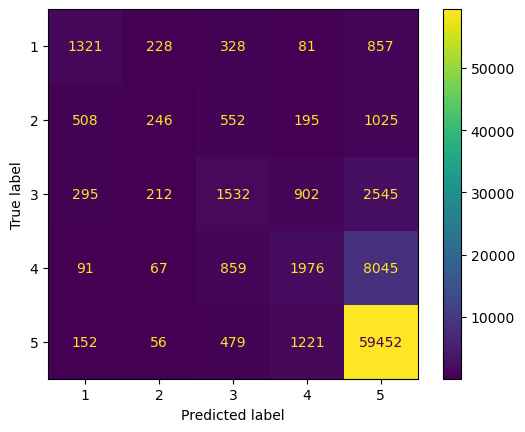

In [ ]:
plot(y_pred_uni,y_test)

### Model Training with Bi-Gram

In [ ]:
# best_bi = logistic_hyperparameter((2,2))
# print(best_bi)
# Best hyperparameters: {'C': 4.998692840654641, 'class_weight': 2, 'k': 20, 'max_iter': 7, 'penalty': 0, 'solver': 2} # Returned by hyperopt
params_bi ={'C': 4.998692840654641, 'class_weight': {1: 7, 2: 12, 3: 9, 4: 8, 5: 7}, 'max_iter': 4500, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
classifier = LogisticRegression(**params_bi)
model_bi = create_pipeline(classifier, TfidfVectorizer(ngram_range=(2,2)),k=23000)
model_bi.fit(X_train,y_train)
y_pred_bi = model_bi.predict(X_test)
print(classification_report(y_pred_bi,y_test))
y_pred = model_bi.predict(X_train)
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           1       0.23      0.62      0.33      1048
           2       0.07      0.28      0.11       626
           3       0.15      0.37      0.22      2313
           4       0.10      0.46      0.17      2510
           5       0.98      0.78      0.87     76728

    accuracy                           0.76     83225
   macro avg       0.31      0.50      0.34     83225
weighted avg       0.91      0.76      0.82     83225

              precision    recall  f1-score   support

           1       0.55      0.92      0.69      3930
           2       0.55      0.90      0.69      3619
           3       0.26      0.69      0.38      4878
           4       0.11      0.60      0.19      4682
           5       0.99      0.80      0.89    177080

    accuracy                           0.80    194189
   macro avg       0.49      0.78      0.57    194189
weighted avg       0.93      0.80      0.85    194189



In [ ]:
f1score = f1_score(y_pred_bi,y_test, average=None)
acc_graph.append(accuracy_score(y_pred_bi,y_test))
class_1_graph.append(f1score[0])
class_2_graph.append(f1score[1])
class_3_graph.append(f1score[2])
class_4_graph.append(f1score[3])
class_5_graph.append(f1score[4])

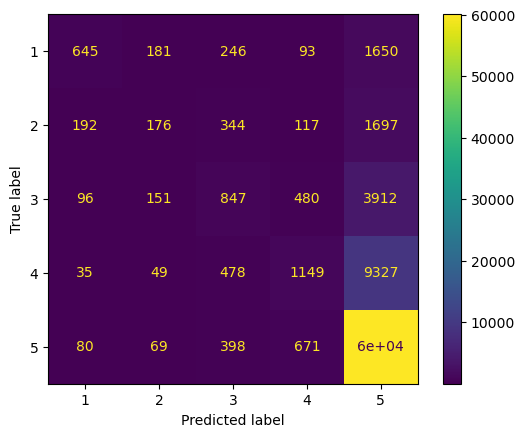

In [ ]:
plot(y_pred_bi,y_test)

### Model Training with Tri-Gram

In [ ]:
# best_tri = logistic_hyperparameter((3,3))
# print(best_tri)
# Best hyperparameters: {'C': 9.976528316497658, 'class_weight': 0, 'k': 22, 'max_iter': 5, 'penalty': 0, 'solver': 1} # Returned by hyperopt
params_tri ={'C': 9.976528316497658, 'class_weight': None, 'max_iter': 3500, 'penalty': 'l2', 'solver': 'lbfgs'}

In [ ]:
classifier = LogisticRegression(**params_tri)
model_tri = create_pipeline(classifier, TfidfVectorizer(ngram_range=(3,3)),k=24500)
model_tri.fit(X_train,y_train)
y_pred_tri = model_tri.predict(X_test)
print(classification_report(y_pred_tri,y_test))
y_pred = model_tri.predict(X_train)
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           1       0.05      0.51      0.09       273
           2       0.00      0.21      0.01        52
           3       0.02      0.29      0.04       357
           4       0.03      0.49      0.05       599
           5       0.99      0.74      0.85     81944

    accuracy                           0.74     83225
   macro avg       0.22      0.45      0.21     83225
weighted avg       0.98      0.74      0.84     83225

              precision    recall  f1-score   support

           1       0.30      0.96      0.45      2030
           2       0.30      1.00      0.46      1755
           3       0.10      0.89      0.17      1389
           4       0.03      0.57      0.05      1311
           5       1.00      0.76      0.86    187704

    accuracy                           0.76    194189
   macro avg       0.34      0.83      0.40    194189
weighted avg       0.97      0.76      0.84    194189



In [ ]:
f1score = f1_score(y_pred_tri,y_test, average=None)
acc_graph.append(accuracy_score(y_pred_tri,y_test))
class_1_graph.append(f1score[0])
class_2_graph.append(f1score[1])
class_3_graph.append(f1score[2])
class_4_graph.append(f1score[3])
class_5_graph.append(f1score[4])

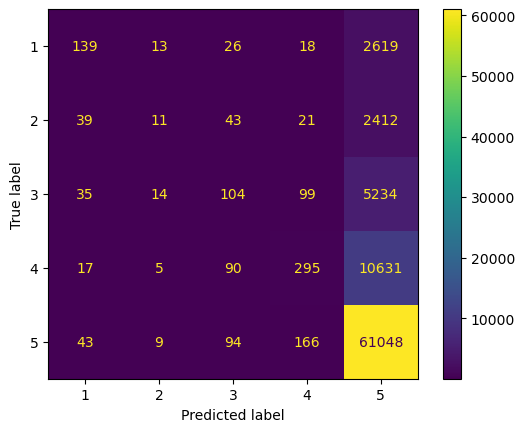

In [ ]:
plot(y_pred_tri,y_test)

### Model Training with N-Gram

In [ ]:
# best_n = logistic_hyperparameter((1,3))
# print(best_n)
# Best hyperparameters: {'C': 5.251151750226657, 'class_weight': 0, 'k': 30, 'max_iter': 9, 'penalty': 0, 'solver': 2} # Returned by hyperopt
params_ngram ={'C': 5.251151750226657, 'class_weight': None, 'max_iter': 5500, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
classifier = LogisticRegression(**params_ngram)
model_ngram = create_pipeline(classifier, TfidfVectorizer(ngram_range=(1,3)),k=30500)
model_ngram.fit(X_train,y_train)
y_pred_ngram = model_ngram.predict(X_test)
print(classification_report(y_pred_ngram,y_test))
y_pred = model_ngram.predict(X_train)
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           1       0.48      0.55      0.51      2473
           2       0.07      0.35      0.11       487
           3       0.24      0.40      0.30      3306
           4       0.21      0.42      0.28      5508
           5       0.96      0.83      0.89     71451

    accuracy                           0.77     83225
   macro avg       0.39      0.51      0.42     83225
weighted avg       0.86      0.77      0.81     83225

              precision    recall  f1-score   support

           1       0.53      0.80      0.64      4400
           2       0.30      0.94      0.45      1859
           3       0.23      0.60      0.34      4970
           4       0.15      0.53      0.23      7136
           5       0.99      0.80      0.88    175824

    accuracy                           0.79    194189
   macro avg       0.44      0.73      0.51    194189
weighted avg       0.92      0.79      0.84    194189



In [ ]:
f1score = f1_score(y_pred_ngram,y_test, average=None)
acc_graph.append(accuracy_score(y_pred_ngram,y_test))
class_1_graph.append(f1score[0])
class_2_graph.append(f1score[1])
class_3_graph.append(f1score[2])
class_4_graph.append(f1score[3])
class_5_graph.append(f1score[4])

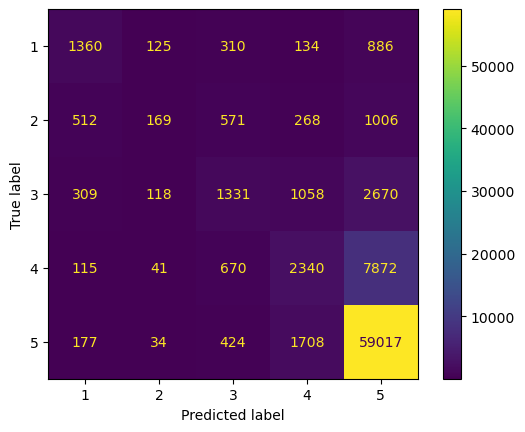

In [ ]:
plot(y_pred_ngram,y_test)

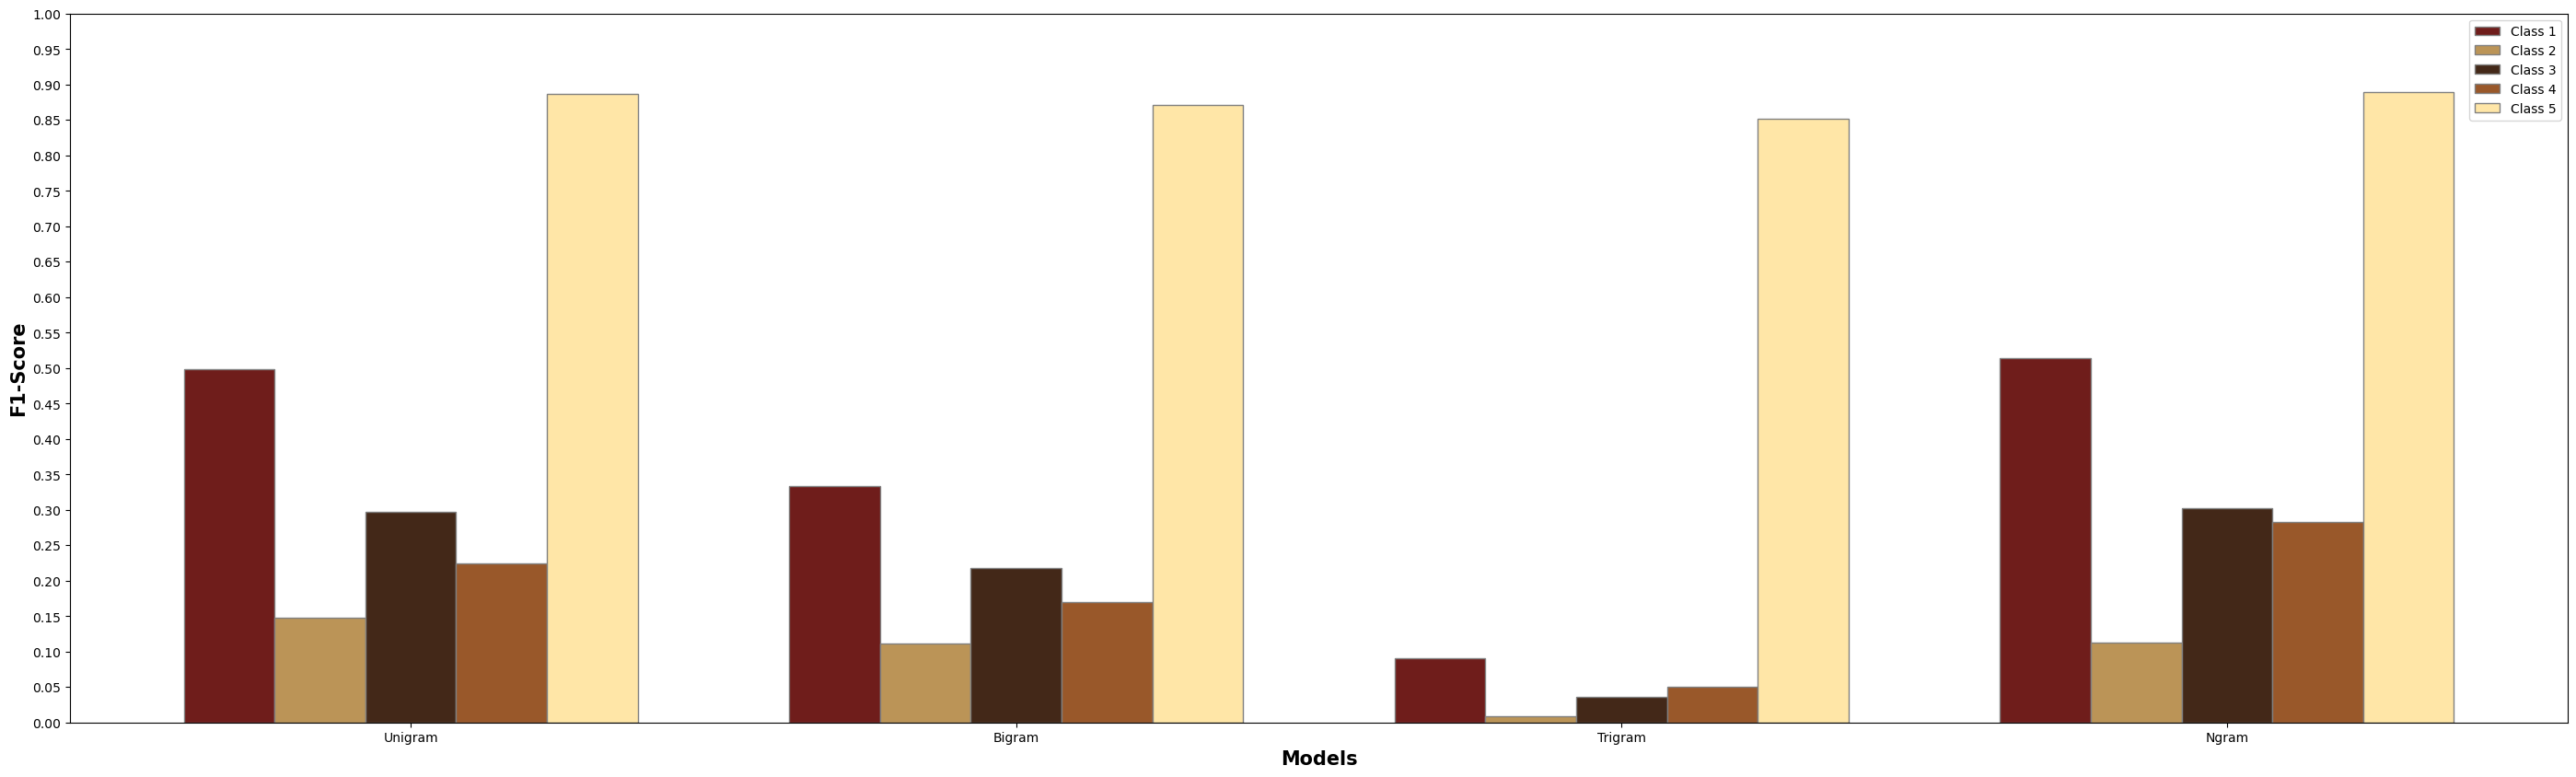

In [ ]:
barWidth = 0.15
fig,ax = plt.subplots(figsize =(35, 10)) 

br1 = np.arange(len(acc_graph)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 
br5 = [x + barWidth for x in br4] 

plt.bar(br1, class_1_graph, color ='#6F1D1B', width = barWidth, edgecolor ='grey', label ='Class 1') 
plt.bar(br2, class_2_graph, color ='#BB9457', width = barWidth, edgecolor ='grey', label ='Class 2') 
plt.bar(br3, class_3_graph, color ='#432818', width = barWidth, edgecolor ='grey', label ='Class 3') 
plt.bar(br4, class_4_graph, color ='#99582A', width = barWidth, edgecolor ='grey', label ='Class 4') 
plt.bar(br5, class_5_graph, color ='#FFE6A7', width = barWidth, edgecolor ='grey', label ='Class 5') 

ax.set_yticks(np.arange(0, 1.05, 0.05))

plt.xlabel('Models', fontweight ='bold', fontsize = 15) 
plt.ylabel('F1-Score', fontweight ='bold', fontsize = 15) 
plt.xticks([r + 2 * barWidth for r in range(len(acc_graph))], 
        ['Unigram', 'Bigram', 'Trigram', 'Ngram'])
 
plt.legend()
plt.show() 

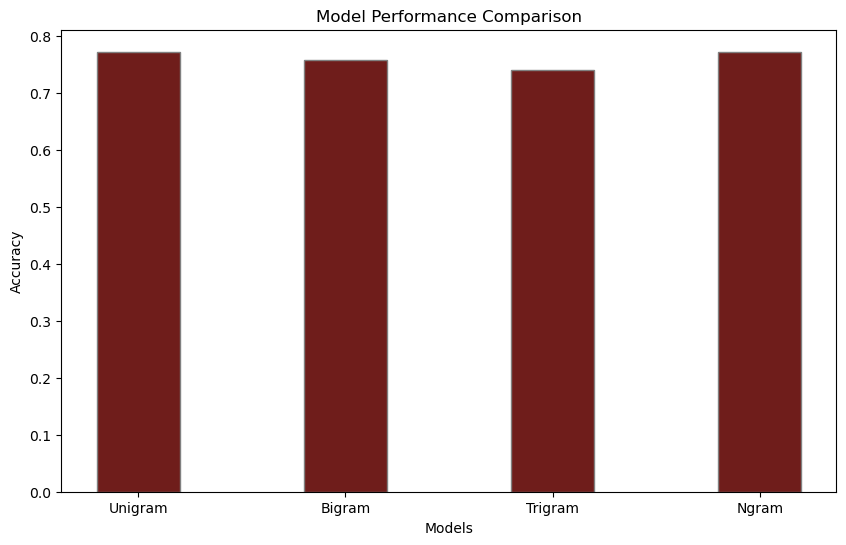

In [ ]:
barWidth = 0.4 
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = np.arange(len(acc_graph))

ax.bar(bars, acc_graph, color='#6F1D1B', width=barWidth, edgecolor='grey')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_xticks(bars)
ax.set_xticklabels(['Unigram', 'Bigram', 'Trigram', 'Ngram'])
ax.set_title('Model Performance Comparison')  # Adding a title

plt.show()

## Discussion and Conclusions

### Training the model
* Parameter tuning was done with hyperopt to increase the models performance and were done with all ngram models to conduct a fair analysis. To deal with class imbalance class weights were given as a parameter to the classifeir to improve the classifer performace. This approach was used instead of balancing the dataset instead of balancing the dataset as we noticed the model performed worse after balancing with methods like SMOTE.
* Feature selectoin was also done based on sci-kit learns ch12.

### TF_IDF Vectorizer
* The TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer highlights the importance of words based on their frequency across documents, effectively distinguishing between common and rare terms. Utilizing the vectorizer in our models training also has improved its performance.

#### Experiments Results:
From our experiments the following were noted:
* Class weights were given to the logistic regression model though did not increase the accuracy by much was able to distinguish between classes better.
* Unigrams and N-Gram(1,3) has perfomed better than both bi-gram and tri-gram. Although the accuracy of all the models didnt differ by a huge number the f1-scores did indiicating that unigram and ngram models did better in diffrentiating between each of the classes
* We also noticed different the number of features given to the model after vectorizing had influence on the results. We observed reducing the number of features made the model perform better also helped the model to generalize

#### Discussion on n-grams models
* From the  experiment, unigrams and a mixed n-gram range of (1,3) yielded the highest overall accuracy, which can inferred as single words and certain two-words, and 3-words are more predictive of ratings. This could be due to ability of  unigrams to capture the presence of specific  words that are strong indicators of sentiment or rating level while some of the ngram helped in captureing significant phrases. Our research also showed that it was common in sentimental analysis, rating classification tasks for uni-grams to perform well, our research also showed that while uni-grams perform well it could potentially lead to a an overfit model as they also increase the dimensionality of the feature space exponentially. To prevent from an overfit model we decided to do feature selection to decrease the dimenitality of the data.
* Though bi-grams and tri-grams had a decrease in accuracy by a small number the f1-scores differed by a lot. Especially for tri-grams where all the the f1-scores were almost near 0 except for one of the class. The reason behind this could be that these n-grams might have introduced noise and biasis to the model. The word combination occuring after vectorizing by bi-gram and tri-gram might occur infrequently across the data making it hard for the model to leanrn. Research by Wang and Manning (2012) on "Baselines and Bigrams: Simple, Good Sentiment and Topic Classification" supports this observation, showing that while n-grams capture more contextual information, they also introduce noise and diminish model generalizability, particularly affecting precision and recall metrics critical for calculating F1 scores.

[Baselines and Bigrams: Simple, Good Sentiment and Topic Classification](https://aclanthology.org/P12-2018) (Wang & Manning, ACL 2012)

## XGBoost
* We chose XGBoost due to its advanced regularization features, which help prevent overfitting, a common issue we faced throughout.
* We used the same preprocessing we mentioned in the above sections.
* We used trained the model with two different vectorizers:
    1. TF-IDF - The rationale behind this was based on previous experiments, we wanted to try it along with XGBoost Classifier as the classifier is known for performing good with text-classification
    2. Google's Word2Vec - We picked Google word2vec to experiment with the embedding based test representation.
* We used random over sampling to increases the number of samples to 23000 for the furst 3 classes as oversampling with XGBoost did not cause any consequences and infact increased the models performaces unlike when tested with the other models. Therefore since this required a bit of differnt preprocessing we didnt use our custon pipeline for this
* Hyperopt was again used to optimze the classifiers parameters along with to choose the best number of features for model training. However, feature selection was not done with google's word2vec as it in general returned only 300 features.

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
sampling_strategy = {i: 23000 for i in range(1, 4)}
undersampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train, y_train= undersampler.fit_resample(X_train, y_train)

y_train_adjusted = y_train-1 # We adjust the class labels in `y_train_under` by subtracting 1 from each, aligning them to start from 0 as required by XGBoost's classifier convention.
y_test_xg = y_test-1

### NGram

In [ ]:
# space = {
#     'max_depth': hp.choice('max_depth', np.arange(3, 11, dtype=int)),
#     'n_estimators': hp.choice('n_estimators', np.arange(100, 1001, 100, dtype=int)),
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
#     'subsample': hp.uniform('subsample', 0.5, 1.0),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
#     'min_child_weight': hp.choice('min_child_weight', np.arange(1, 11, dtype=int)),
#     'reg_lambda': hp.uniform('reg_lambda', 1, 100),
#     'k': hp.choice('k', np.arange(8000, 17000, 500, dtype=int))
# }

# def objective(params):
#     k = params.pop('k')
#     feature_selector = SelectKBest(chi2, k=k)
#     X_train_sel = feature_selector.fit_transform(X_train, y_train)
#     X_test_sel = feature_selector.transform(X_test)
#     clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params)
#     score = cross_val_score(clf, X_train_sel, y_train_adjusted, scoring='accuracy', cv=5).mean()
#     print(f"\nTrial completed:")
#     print(f"Params: {params} features:{k}")
#     print(f"Accuracy: {score}, Loss: {-score}")
#     return {'loss': -score, 'status': STATUS_OK}
# # Run the optimization
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=50,
#             trials=trials)

# print("Best hyperparameters:", best)



In [ ]:
params = {'colsample_bytree': 0.8230008586447808,
 'learning_rate': 0.1909617073607323,
 'max_depth': 10,
 'min_child_weight': 4,
 'n_estimators': 1000,
 'reg_lambda': 4.163618957089685,
 'subsample': 0.59102293915828 }

model_xgt =  xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params)
model_xgt.fit(X_train, y_train_adjusted)
y_pred_xgt = model_xgt.predict(X_test)
print(classification_report(y_pred_xgt,y_test_xg))
y_pred = model_ngram.predict(X_train)
print(classification_report(y_pred,y_train))
y_pred_xgt = y_pred_xgt+1


In [ ]:
plot(y_pred_xgt,y_test)

From out previous conclusions of n-grams, we found that XGBoost, when paired with TF-IDF vectorization, effectively increassed the predictive power giving us a 78% on accuracy on our test set and a 79.78 in the kaggle competition.



### Googles Word2Vec

In [38]:
google_word2vec = KeyedVectors.load_word2vec_format("../Amazon-Reviews/GoogleNews-vectors-negative300.bin", binary=True)

def document_vector(word2vec_model, doc_tokens):
    tokens = [token for token in doc_tokens if token in word2vec_model.key_to_index]
    if not tokens:
        return np.zeros(word2vec_model.vector_size)
    doc_vector = np.mean(word2vec_model[tokens], axis=0)
    return doc_vector

In [ ]:
X_train = np.array([document_vector(google_word2vec,doc) for doc in X_train])
X_test = np.array([document_vector(google_word2vec,doc) for doc in X_test])
sampling_strategy = {i: 23000 for i in range(1, 4)}
undersampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
y_train_under = y_train_under-1 # We adjust the class labels in `y_train_under` by subtracting 1 from each, aligning them to start from 0 as required by XGBoost's classifier convention.
y_test_xgb = y_test -1

In [ ]:
# space = {
#     'max_depth': hp.choice('max_depth', np.arange(3, 11, dtype=int)),
#     'n_estimators': hp.choice('n_estimators', np.arange(100, 1001, 100, dtype=int)),
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
#     'subsample': hp.uniform('subsample', 0.5, 1.0),
#     'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
#     'min_child_weight': hp.choice('min_child_weight', np.arange(1, 11, dtype=int)),
#     'reg_lambda': hp.uniform('reg_lambda', 1, 100),
# }

# def objective(params):
#     clf = xgb.XGBClassifier(eval_metric='mlogloss', **params)
#     score = cross_val_score(clf, X_train_under, y_train_under, scoring='accuracy', cv=5).mean()
#     print(f"\nTrial completed:")
#     print(f"Accuracy: {score}, Loss: {-score}")
#     return {'loss': -score, 'status': STATUS_OK}
# # Run the optimization
# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=10,
#             trials=trials)
# word2vec_best = best
# print(word2vec_best)
# print("Best hyperparameters:", best)

In [ ]:
# clf = xgb.XGBClassifier(eval_metric='mlogloss', **params_xgb)
# clf.fit(X_train_under,y_train_under)
# y_pred_xgb = clf.predict(X_test)
# print(classification_report(y_pred_xgt,y_test_xgb))
# y_pred = clf.predict(X_train)
# print(classification_report(y_pred,y_train_under))
# y_pred_xgt =y_pred_xgt-1

In [ ]:
# plot(y_pred_xgt,y_test)

Google's Word2Vec proved superior to all our used vectorizers, achieving an accuracy of nearly 84%. We haven't been able to display the results in the notebook currently, as the optimization is still underway on DMOG, given that tuning this particular model is computationally intensive. However, we have attached a screenshot in the markdown of the scores received during the training process. The code for the training process is commented out above. The scores displayed now are the ones without optimization.

![alt text](image-2.png)

## Random Forest Classifier

* We chose Random Forest Classifer to test out Count Vedctorizer. 
* For the preprocessing we chose POS tagged Lemmatization as mentioned above along with the basic cleaning of the text.
* We did not try any balancing on the dataset before training the model as balancing techniques like SMOTE, Random Over sampling and Random Under sampling, and training the model with Random Forest Classifier Balanced weight parameter just made the results worse.
* We again did feature selection to reduce the dimentionality of the dataset.
* The model was optimized using Hyperopt

In [ ]:
# space = {
#     'n_estimators': hp.choice('n_estimators', np.arange(100, 1501, 100, dtype=int)),
#     'max_depth': hp.quniform('max_depth', 5, 50, 5),  
#     'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1), 
#     'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1), 
#     'max_features': hp.choice('max_features', [ 'sqrt', 'log2', None]),
#     'k': hp.choice('k', np.arange(8000, 20000, 1000, dtype=int)),
# }

# def objective(params):
#     params['max_depth'] = int(params['max_depth'])
#     params['min_samples_split'] = int(params['min_samples_split'])
#     params['min_samples_leaf'] = int(params['min_samples_leaf'])

#     k = params.pop('k')
#     classifier = RandomForestClassifier(**params)
#     vectorizer = CountVectorizer()

#     model = create_pipeline(classifier, vectorizer,Normalizer(norm='l2') ,feature_selection=True, k=k)
#     score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
#     print(f"\nTrial completed:")
#     print(f"Params: {params} features:{k}")
#     print(f"Accuracy: {score}, Loss: {-score}")
#     return {'loss': -score, 'status': STATUS_OK}

# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=30,
#             trials=trials)
# random_forest_best = best
# print(random_forest_best)
# print("Best hyperparameters:", best)

In [ ]:
# Best hyperparameters: {'k': 9,'max_depth': 3, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 6,} # Returned by hyperopt
params_ngram ={'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 700}

In [ ]:
params = {'colsample_bytree': 0.8230008586447808,
 'learning_rate': 0.1909617073607323,
 'max_depth': 10,
 'min_child_weight': 4,
 'n_estimators': 1000,
 'reg_lambda': 4.163618957089685,
 'subsample': 0.59102293915828 }

model_rf = create_pipeline(classifier, vectorizer,Normalizer(norm='l2') ,feature_selection=True, k=k)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_pred_rf,y_test))
y_pred = model_ngram.predict(X_train)
print(classification_report(y_pred,y_train))

plot(y_pred_rf,y_test)

The Random Forest Classifier with Count Vectorizer and POS-tagged lemmatization gave us a decent accuracy of 76%. Although on kaggle it gave 80%. We belive this is because our model was overfit.

## SGD

* We chose SGD to test out Binary Count Vedctorizer. 
* For the preprocessing we chose POS tagged Lemmatization as mentioned above along with the basic cleaning of the text.
* We did not try any balancing on the dataset before training the model as balancing techniques like SMOTE, Random Over sampling and Random Under sampling, and training the model with Random Forest Classifier Balanced weight parameter just made the results worse.
* We again did feature selection to reduce the dimentionality of the dataset.
* The model was optimized using Hyperopt

In [ ]:
# space = {
#     'alpha': hp.uniform('alpha', 0.00001,0.0001), 
#     'penalty': hp.choice('penalty', ['l2', 'l1', 'elasticnet']),
#     'loss': hp.choice('loss', ['log_loss', 'modified_huber']), 
#     'max_iter': hp.choice('max_iter', np.arange(5000, 20001, 5000, dtype=int)),  
#     'learning_rate': hp.choice('learning_rate', ['constant', 'optimal', 'adaptive']),
#     'eta0': hp.loguniform('eta0', np.log(0.001), np.log(1)),
#     'k': hp.choice('k', np.arange(8000, 20000, 1000, dtype=int)),
# }

# def objective(params):
#     k = params.pop('k')
#     classifier = SGDClassifier(**params)
#     vectorizer = CountVectorizer(binary = True)

#     model = create_pipeline(classifier, vectorizer,Normalizer(norm='l2') ,feature_selection=True, k=k)
#     score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()
#     print(f"\nTrial completed:")
#     print(f"Params: {params} features:{k}")
#     print(f"Accuracy: {score}, Loss: {-score}")
#     return {'loss': -score, 'status': STATUS_OK}

# trials = Trials()
# best = fmin(fn=objective,
#             space=space,
#             algo=tpe.suggest,
#             max_evals=50,
#             trials=trials)



# SGD_best = best
# print(SGD_best)
# print("Best hyperparameters:", best)

In [ ]:
# Best hyperparameters: {'alpha': 1.1093747611540199e-05, 'eta0': 1.0001134113337178, 'k': 9, 'learning_rate': 2, 'loss': 1, 'max_iter': 2, 'penalty': 0} # Returned by hyperopt
params_sgd = {'alpha': 1.1093747611540199e-05, 'eta0': 1.0001134113337178, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'max_iter': 15000, 'penalty': 'l2'}

In [ ]:
classifier =  SGDClassifier(**params_sgd)
model_SGD = create_pipeline(classifier, CountVectorizer(binary=True),k=17000)
model_SGD.fit(X_train,y_train)
y_pred_sgd = model_SGD.predict(X_test)
print(classification_report(y_pred,y_test))
y_pred = model_ngram.predict(X_train)
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           1       0.42      0.51      0.46      2315
           2       0.10      0.24      0.14      1064
           3       0.23      0.36      0.28      3446
           4       0.16      0.40      0.22      4346
           5       0.96      0.82      0.88     72054

    accuracy                           0.76     83225
   macro avg       0.37      0.46      0.40     83225
weighted avg       0.86      0.76      0.80     83225

              precision    recall  f1-score   support

           1       0.63      0.79      0.70      5193
           2       0.33      0.88      0.48      2214
           3       0.37      0.62      0.46      7696
           4       0.22      0.57      0.32      9963
           5       0.98      0.83      0.90    169123

    accuracy                           0.81    194189
   macro avg       0.51      0.74      0.57    194189
weighted avg       0.90      0.81      0.84    194189



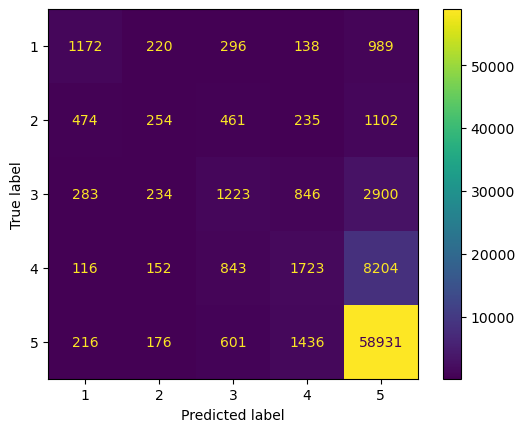

In [ ]:
plot(y_pred_sgd,y_test)

# Sequence Models

The inherent limitation of BoW models is their inability to capture the order of words, crucial for understanding the semantic and syntactic nuances of language. Transitioning to sequence models, in this section, Models like LSTM, Bi-Directional LSTM's, Transformers like RoBERTa (roberta-base) and Bert(bert-base), introduces the capability to consider the entire context of a sentence or document, preserving the word order and capturing deeper patterns. We focused on optimizing a transformer model after observing that it outperformed all other models, leading to significantly improved results. This strategic emphasis on transformer optimization was key to enhancing our model's performance.

## LSTM

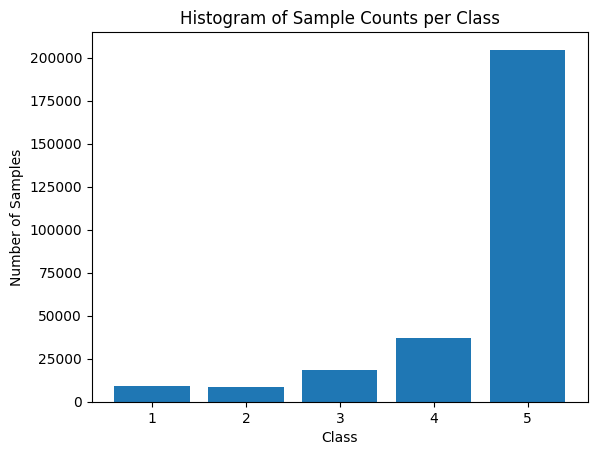

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.duplicated().sum()
train = train.drop_duplicates()
class_counts = train['overall'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Histogram of Sample Counts per Class')
plt.show()

In [5]:
test.isnull().sum()
test.duplicated().sum()

0

In [6]:
train["Review"]= train["Review"].astype(str)


In [7]:
def preprocessSequential(text, tokenizer, max_length):
    text_cleaned = re.sub(r'[^a-zA-Z\s]', '', text)
    text_cleaned = text_cleaned.lower().strip()
    sequences = tokenizer.texts_to_sequences([text_cleaned])
    seq_lengths = np.array([len(s) for s in sequences])
    padded_seq = pad_sequences(sequences, maxlen=max_length, padding='post')
    return padded_seq[0]  # Return the padded sequence

In [8]:
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(train["Review"].tolist())

## Word frequency Analysis :
 From the following graph, we can notice a high coverage of the dataset with the top 10,000 most frequent words since the curve flattens out around that point. This suggests that setting num_words to 10,000 would cover the majority of the textual content without the additional overhead of including rare words that don't contribute much to coverage. Beyond the 10,000 word mark, we can notice mostly rarely occuring words in the dataset. Including rare words might contribute to overfitting hence we set num_words to 10,000. However through our testing using 20000 as the num words yeilded a slightly better accuracy as compared to 10000.



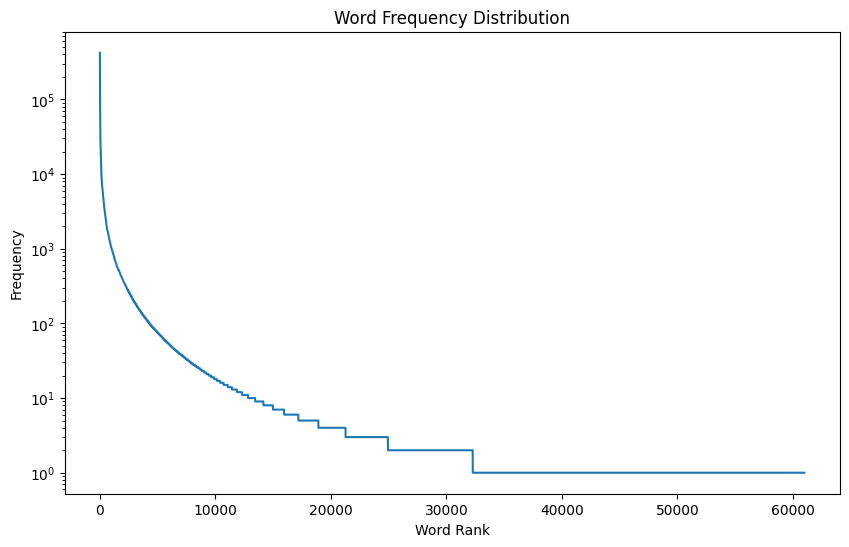

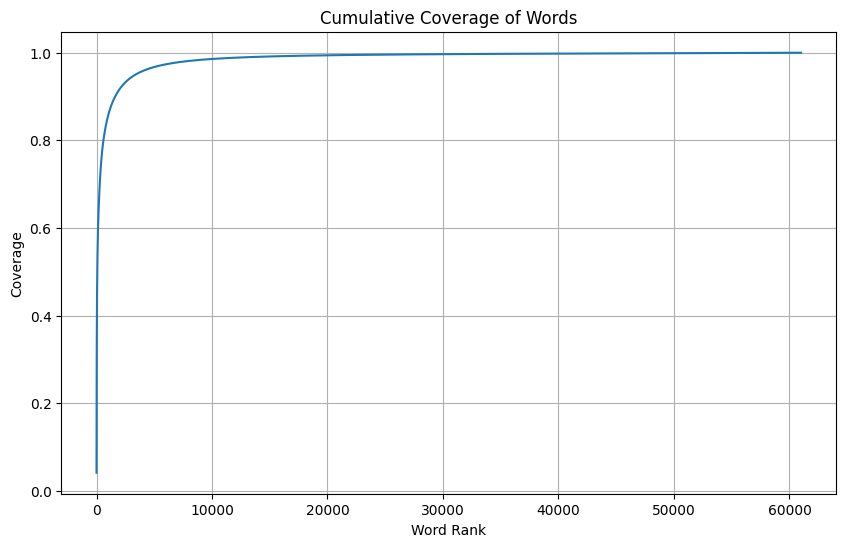

In [19]:
word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot([count for _, count in sorted_word_counts])
plt.title("Word Frequency Distribution")
plt.xlabel("Word Rank")
plt.ylabel("Frequency")
plt.yscale("log")  # Use logarithmic scale to better visualize the distribution
plt.show()

# You can also plot a cumulative distribution to better understand coverage
cumulative_coverage = np.cumsum([count for _, count in sorted_word_counts]) / sum(word_counts.values())
plt.figure(figsize=(10, 6))
plt.plot(cumulative_coverage)
plt.title("Cumulative Coverage of Words")
plt.xlabel("Word Rank")
plt.ylabel("Coverage")
plt.grid(True)
plt.show()

For the max_length we set it to the 95th percentile of sequence lengths.

In [10]:
sequence_lengths = [len(seq) for seq in tokenizer.texts_to_sequences(train["Review"].tolist())]
max_length = np.percentile(sequence_lengths, 95)


We apply preprocessing, but cleaning the text, tokenize and pad the sequences.

In [11]:
train["Padded_Sequences"] = train["Review"].apply(lambda x: preprocessSequential(x, tokenizer, int(max_length)))


In [12]:
X = np.array(train["Padded_Sequences"].tolist())

In [13]:
y = train["overall"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.9, stratify=y_temp, random_state=42)

print('Original class distribution:', Counter(y_train))


Original class distribution: Counter({5: 163625, 4: 29433, 3: 14630, 1: 7506, 2: 6737})


In [14]:
unique_labels = np.unique(y_train)
print("Unique labels in the training set:", unique_labels)

Unique labels in the training set: [1 2 3 4 5]


We tried to counter the imbalance of data through SMOTE but it yielded extremely bad results. The model was also trained with computed class weights but this too did not yield satisfactory results. We tried without imbalancing which performed the best for this model.

In [15]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

We use softmax for the final dense layer and hence we one-hot encode the data. Although in hindsight using other more advanced encoding schemes would yield better results.

In [16]:
y_train = to_categorical(y_train-1, num_classes=5)
y_test = to_categorical(y_test-1, num_classes=5)


### max_words / input_dim :
 maximum number of frequent words that are to be included in the tokenizer's vocabulary. Rare words represented by the mark beyond 10,000, will not appear in the sequences used for training. This is done to reduce overfitting, as mentioned above.
We add a spatial dropout of 0.3 in the embedding layer, a dropout and a recurrent dropout in the LSTM layers to reduce overfitting. This however decreased the learning rate by a lot by the model seemed to learn the under-represented classes better.
For the optimizer we used ADAM.

In [17]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=int(max_length)))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\blobb\.conda\envs\torch\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)
c:\Users\blobb\.conda\envs\torch\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)
c:\Users\blobb\.conda\envs\torch\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)
c:\Users\blobb\.conda\envs\torch\lib\random.py:370: DeprecationWarning: non-integer arguments to randrange() have been deprecated since Python 3.10 and will be removed in a subsequent version
  return self.randrange(a, b+1)


In [ ]:
# model.fit(X_train, y_train, epochs=10, batch_size=32)


In [ ]:
y_test_int = np.argmax(y_test, axis=1)
y_pred = model.predict(X_test)
y_pred_int = np.argmax(y_pred, axis=1)
print(classification_report(y_test_int, y_pred_int))
y_train_int = np.argmax(y_train, axis=1)
y_train_pred = model.predict(X_train)
y_train_pred_int = np.argmax(y_train_pred, axis=1)
print(classification_report(y_train_int, y_train_pred_int))

In [ ]:
test["Review"]= test["Review"].astype(str)
tokenizer.fit_on_texts(test["Review"].tolist())
test["Padded_Sequences"] = test["Review"].apply(lambda x: preprocessSequential(x, tokenizer, int(max_length)))
X_final = np.array(test["Padded_Sequences"].tolist())

In [ ]:
predict = model.predict(X_final)
predict = pd.DataFrame(predict)

In [ ]:
predict_final = np.argmax(predict, axis=1)
predict_final

In [ ]:
predict_final = predict_final +1

In [ ]:
final_prediction = pd.DataFrame(predict_final)

In [ ]:
# final_prediction.to_csv("./predictions/prediction11.csv")
# read = pd.read_csv("./predictions/prediction11.csv")
# read = read.rename(columns={
#     'Unnamed: 0': 'id',
#     '0': 'Review'
# })
# read.to_csv("./predictions/prediction11.csv",index=False)
# read = pd.read_csv("./predictions/prediction11.csv")
# read

## Bi-Directional LSTM

To enhance our last LSTM model, we integrated a Bidirectional LSTM layer, which  improved our model's performance. We believe the improvement stems from the Bidirectional LSTM's ability to process text from both forward and backward directions, providing a richer understanding of context. This dual-direction processing captures more nuanced patterns and relationships within the text, which are pivotal for accurately classifying and understanding complex linguistic structures.

We are not able to show the results of the model here on live as it took a long time to run the model, and re-run the model isnt feasible.The model was trained a while back and screenshots of the score along with the model with image of the wordembedding is in the report as wwell as in the notebook as a markdown.

* We processed the data following the steps outlined above, utilizing our custom function for cleaning the text and lemmatizing with POS tagging. 
* The data was split into training, validation, and testing sets with proportions of 60%, 20%, and 20%, respectively.


In [104]:
y = train["overall"]
X_train, X_test, y_train, y_test = train_test_split(train["Review"], y, stratify=y,test_size=0.4, random_state=42)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, stratify=y_test,test_size=0.5, random_state=42)
X_train = X_train.apply(cleaning_text)
X_test = X_test.apply(cleaning_text)
X_validation = X_validation.apply(cleaning_text)
X_test = X_test.apply(preprocess,POS=True)
X_test = X_test.apply(preprocess,POS=True)
X_validation = X_validation.apply(preprocess,POS=True)
y_train = y_train-1
y_validation = y_validation -1
y_test = y_test -1

* We used TensorFlow's tf.data.Dataset for its efficiency in managing large datasets, enabling faster training and better handling of data through optimized processing techniques like batching and prefetching. 
* We utilized TensorFlow's TextVectorization layer for processing our text data. This layer tokenizes the text into individual words or tokens and then converts these tokens into numerical indices, allowing to feed the data into the neural network

In [105]:
X_train_under = X_train
X_train_under = tf.data.Dataset.from_tensor_slices((X_train_under,y_train)).batch(128)
X_validation_dataset = tf.data.Dataset.from_tensor_slices((X_validation, y_validation)).batch(128)
X_test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(128)
encoder = TextVectorization(max_tokens=15000)
encoder.adapt(X_train_under.map(lambda text, label: text))  

2024-04-01 15:28:15.959591: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [106]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3,        
    restore_best_weights=True, 
)

model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        len(encoder.get_vocabulary()), 128, mask_zero=True),
 
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
 
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [107]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train_under,
    epochs=20,  
    validation_data=X_validation_dataset,
    callbacks=[early_stopping], 
    verbose=1
)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_dataset)
print(f" Test Accuracy: {test_accuracy}")

![alt text](Untitled.png)

We use PCA on the embedding layer's output to visualize our model's learned word representations

In [ ]:
embedding_layer = model.layers[1]
embeddings = embedding_layer.get_weights()[0]

In [78]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
words = list(encoder.get_vocabulary())[:100]  # Adjust the number of words you want to visualize
for i, word in enumerate(words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

![alt text](image.png)

### Discussion
The bi-directional LSTM outperformed the standard LSTM, delivering better results we believe this due  to its ability to understand context from both directions. It gave us 79.8 on Kaggle. We believe that with further tuning and additional preprocessing steps, the model's performance can be enhanced further.

## Transformers

We tuned both Roberta and Bert but found that bert produced better results and hence displayed the training and testing of bert here to avoid unnecessary repetition and duplication. We believe that it is highly likely the Roberta was overfitting or that our given dataset aligned more closely with Berts training rather than Roberta. 

Although we expected Roberta to do better on initial study and analysis, after the final training was done Bert outperformed Roberta. It was ensured that the hyperparameters when training both the models were kept consistent. Different hyperparameters were also experimented on but due to resource constraints we couldn't explore and experiment as much as we wanted to. After extensive research we have come to a conclusion that the hyperparameters selected for our experiments could have likely favoured Bert more than Roberta.

### Model Training

The training was done utilizing Nvidia GPUs on DMOG. In the code we set device to CUDA because of this.

In [ ]:
# Load pre-trained model and tokenizer
new_model = "bert_trained"
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

# Check for CUDA availability and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"CUDA is available. Current device: {torch.cuda.current_device()} - {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CUDA is not available, using CPU instead.")

# Move model to the chosen device
model.to(device)

The dataset underwent basic preprocessing to convert reviews into a suitable format for the Transformer model. This involved:
* Ensuring all text data was in string format.
* Handling missing values to maintain data integrity.
* Adjusting the overall rating to align with a zero-indexed labeling system, essential for classification tasks.

In [ ]:
# Load and prepare dataset
df = pd.read_csv("train.csv")
df['Review'] = df['Review'].astype(str)
df.dropna(subset=['Review', 'overall'], inplace=True)
df['overall'] = df['overall'].astype(int) - 1  

# Split the dataset into training and testing
train_df, test_df = train_test_split(df, test_size=0.3, stratify=df['overall'], random_state=42)
train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

In [ ]:
# Define the tokenize function
def tokenize_function(examples):
    tokenized_inputs = tokenizer(examples['Review'], truncation=True, padding="max_length", max_length=512, return_tensors="pt")
    tokenized_inputs['labels'] = examples['overall']
    return tokenized_inputs

# Tokenize the datasets
tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)

tokenized_train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
tokenized_test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

* A custom training setup was defined using the TrainingArguments class, specifying parameters like the number of epochs, batch size, warmup steps, and logging configuration, tailored to optimize model performance over the training process.
* The Trainer class facilitated the training of the roberta-base/bert-base model on the tokenized dataset, with evaluations conducted against a split test dataset to monitor progress and performance.

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    save_strategy="epoch"
)

In [ ]:
# Initialize and train the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_test_dataset,
    tokenizer=tokenizer,
)

In [ ]:
# Train the model
# trainer.train()

In [ ]:
results = trainer.evaluate()

### Model Testing

#### Preparing the Data

The review texts are preprocessed using the RoBERTa/Bert tokenizer depending on the model we load, which includes padding, truncation, and conversion to PyTorch tensors. This step is crucial for standardizing the input data format and length, ensuring consistency across all inputs fed into the model.

In [ ]:
# load the fine-tuned model and tokenizer
model_name = "bert"
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

In [ ]:
# Load the review data
input_file = "test.csv"  # Update this to the path of your input CSV file
df = pd.read_csv(input_file)
df['Review'] = df['Review'].astype(str)

* Classification Process: Each review is individually tokenized, converted to the appropriate device - this was done as it was initially tested on dmog to run faster. The tokenized review is then passed through the model. The model's output logits are interpreted to obtain the most likely class for each review.
* Prediction Adjustment: The predictions are adjusted by adding 1, as while training the labels were made to start from 0. This adjustment aligns the predictions with a 1-5 rating scale, making it more interpretable and ready for analysis.

In [ ]:
# Prepare the reviews for the model
def prepare_data(reviews):
    tokenized = tokenizer(reviews, padding=True, truncation=True, max_length=512, return_tensors="pt")
    return tokenized

# Classify reviews and add predictions to the DataFrame
def classify_reviews(df):
    predictions = []
    for review in df['Review']:
        inputs = prepare_data(review).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=1)
            predictions.append(preds.item() + 1)
    df['overall'] = predictions
    return df

In [ ]:
# Apply the classification
df = classify_reviews(df)

Here we add the model's predictions back into the DataFrame and exporting the results to a CSV file. This output file, "prediction17.csv", contains the ids and predicted ratings for each review which was then submitted to the kaggle competition.

In [ ]:
# Save the DataFrame with predictions to a new CSV file
# output_file = "predictions/prediction17.csv"
# df[['id', 'overall']].to_csv(output_file, index=False)

In [ ]:
output_file = "predictions/prediction17.csv"
df = pd.read_csv(output_file)

class_counts = df['overall'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Histogram of Sample Counts per Class')
plt.show()

# Topic Modelling Using LDA
Utilizing Latent Dirichlet Allocation (LDA), we categorized reviews into ten topics each for high and low ratings after preprocessing the text data. Preprocessing included cleaning text, such as lowercasing, removing punctuation, and applying POS tagging for more nuanced tokenization. We then created TF-IDF vector representations for each set of reviews to input into our LDA models.

In [ ]:
high_rated = train[train['overall'] == 5]
low_rated = train[train['overall'] == 1]

In [ ]:
five = high_rated['Review'].apply(cleaning_text)
one = low_rated['Review'].apply(cleaning_text)

five_star = five.apply(preprocess, POS=True)
one_star = one.apply(preprocess,POS=True)


In [ ]:
tfid_vectorizer_high = TfidfVectorizer(ngram_range = (1,1),max_features= 10000)
tfid_vectorizer_low = TfidfVectorizer(ngram_range = (1,1),max_features= 10000)
high = tfid_vectorizer_high.fit_transform(five_star)
low = tfid_vectorizer_low.fit_transform(one_star)

In [ ]:
# selector = SelectKBest(chi2, k=N)
n_topics = 10
lda_high = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_high.fit(high)

lda_low = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_low.fit(low)


In [ ]:
high.shape

### High-rated reviews
For high-rated reviews, the LDA visualization indicates a variety of topics with different levels of prevalence. The intertopic distance map suggests a good separation of topics, indicating distinct themes customers talk about when leaving a positive review.

Prevalent Themes: The larger bubbles, such as Topic 1 and Topic 2, point to prevalent themes in five-star reviews. In topic 1, most of the prevalant terms focused on paint items and the quality and how good it is. The central theme of this topic was different kinds of paint and the materials required for it whereas topic 2 focused more on things like knitting, needle, yarn etc. We had initially experimented with bigrams and trigrams as well during when these words were accompanied with positive words like good, great, high, easy etc. With unigrams the topic classification was more distinct hence we chose to display that.
In unigrams, less frequent smaller topics, highlight specific aspects such as like the customer satisfaction and indicates price and quality indicating customer satisfaction.


In [ ]:
panel_high = pyLDAvis.lda_model.prepare(lda_high, high, tfid_vectorizer_high, mds='tsne')
pyLDAvis.display(panel_high)

### Low-rated reviews
Topic 1 is heavily weighted, hinting at frustrations with product durability and functionality. Terms like "break," "waste," and "return" suggest that products did not meet expectations in terms of use or failed shortly after purchase. This is also the biggest bubble in the case of low-rated reviews indicating that most people were unhappy regarding these things and reported that the product did not have value for money.

Topic 10, although smallest, captures specific attributes of products that have led to customer dissatisfaction. Words such as awful and overpriced relate to negative perceptions of value, while disposable and empty could be related to the quality and functionality of the items.

The LDA visualization of low-rated reviews highlights critical themes of product quality, customer expectations, value for money, and specific product attributes. The overlap between some topics indicates shared concerns across different aspects of dissatisfaction, while the prevalence of certain topics emphasizes areas where improvement is most needed. The presence of both negative and positive terms within topics suggests variability in individual customer experiences, even within the context of overall dissatisfaction.

In [ ]:
panel_low = pyLDAvis.lda_model.prepare(lda_low, low, tfid_vectorizer_low, mds='tsne')
pyLDAvis.display(panel_low)

In [ ]:
def plot_word_clouds(lda_model, vectorizer, n_words=20):
    words = vectorizer.get_feature_names_out()
    components = lda_model.components_
    
    for topic_idx, topic in enumerate(components):
        word_weights = {words[i]: topic[i] for i in topic.argsort()[:-n_words - 1:-1]}
        wordcloud = WordCloud(width=800, height=600, background_color='white').generate_from_frequencies(word_weights)
        
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Topic {topic_idx + 1}')
        plt.show()

Using the tfid_vectorizer_high, which captures the importance of terms within the high-rated reviews, we will generate word clouds for each topic identified by the lda_high model. The word clouds will help us visualize the top 20 terms that are most representative of the topics customers frequently discuss in positive reviews. The word clouds will allow us to quickly identify which terms are most salient within each topic. Words that are larger and more central are those that appear more frequently and are deemed more relevant by the LDA model. Through this visualization, we expect to gain a better understanding of what aspects of products are most appreciated by customers, as indicated by their prevalence in five-star reviews.

In [ ]:
plot_word_clouds(lda_high, tfid_vectorizer_high, n_words=20)

In [ ]:
plot_word_clouds(lda_low, tfid_vectorizer_low, n_words=20)

## Topic Modelling Using NMF

We used NMF as an alternative approach to topic modeling, aiming to validate and compare its effectiveness of our result. The analysis showed that both methods yielded overlapping and similar results showing that the results of our analysis are accurate. While both techniques are powerful for topic extraction, LDA operates on a probabilistic basis, whereas NMF utilizes a linear algebra approach, reflecting their foundational differences in handling text data.

In [ ]:
tfidf_vectorizer_high_nmf = TfidfVectorizer(max_df=0.95, min_df=2)
tfidf_vectorizer_low_nmf = TfidfVectorizer(max_df=0.95, min_df=2)
high = tfidf_vectorizer_high_nmf.fit_transform(five_star)
low = tfidf_vectorizer_low_nmf.fit_transform(one_star)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
nmf_model = NMF(n_components=10, random_state=42)
nmf_high = nmf_model.fit_transform(high)
nmf_components_high = nmf_model.components_
no_top_words = 30
display_topics(nmf_model, tfidf_vectorizer_high_nmf.get_feature_names_out(), no_top_words)

In [ ]:
nmf_model = NMF(n_components=10, random_state=42)
nmf_low = nmf_model.fit_transform(low)
nmf_components_low = nmf_model.components_
no_top_words = 30
display_topics(nmf_model, tfidf_vectorizer_low_nmf.get_feature_names_out(), no_top_words)